# Bike Sharing Regression Model

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike sharing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#create the datafrme by reading the csv file
df = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#check the shape of the dataframe
df.shape

(730, 16)

In [6]:
#check information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# view the summary statistics of the numerical variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


The following columns will be removed:<br>
- `instant` : it is just and index of the rows which can not be usueful to build the model
- `dteday` : Since we have year and Month columns and we have columns to identify the working days, weekdays, and holidays, this column can not be useful.

In [8]:
#drop "instant" and "dteday" vatiables
df.drop(['instant', 'dteday'], axis = 1, inplace = True)

Replaced the numbers with the related names as specified in the Data dictionary for some categorical variables

In [9]:
# Replaced the numbers with the related names
df.season = df.season.map({1 : 'Spring', 2 : 'Summer', 3 : 'Fall', 4 : 'Winter'})
df.weekday = df.weekday.map({0 : 'Sun', 1 : 'Mon', 2 : 'Tue', 3 : 'Wed', 4 : 'Thu', 5 : 'Fri', 6 : 'Sat'})
df.weathersit = df.weathersit.map({1 : 'Clear', 2 : 'Mist+Cloudy', 3 : 'Light Snow/Rain', 4 : 'Heavy Snow/Rain'})

Lets drop `registered` and `casual` columns since they are part of the target variable and should not be used to estimate the target variable

In [10]:
#drop "registered" and "casual" vatiables
df.drop(['registered', 'casual'], axis = 1, inplace = True)

In [11]:
# Check the head of the dataset
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,Sat,0,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,Sun,0,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
#Create a list of numeric columns
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

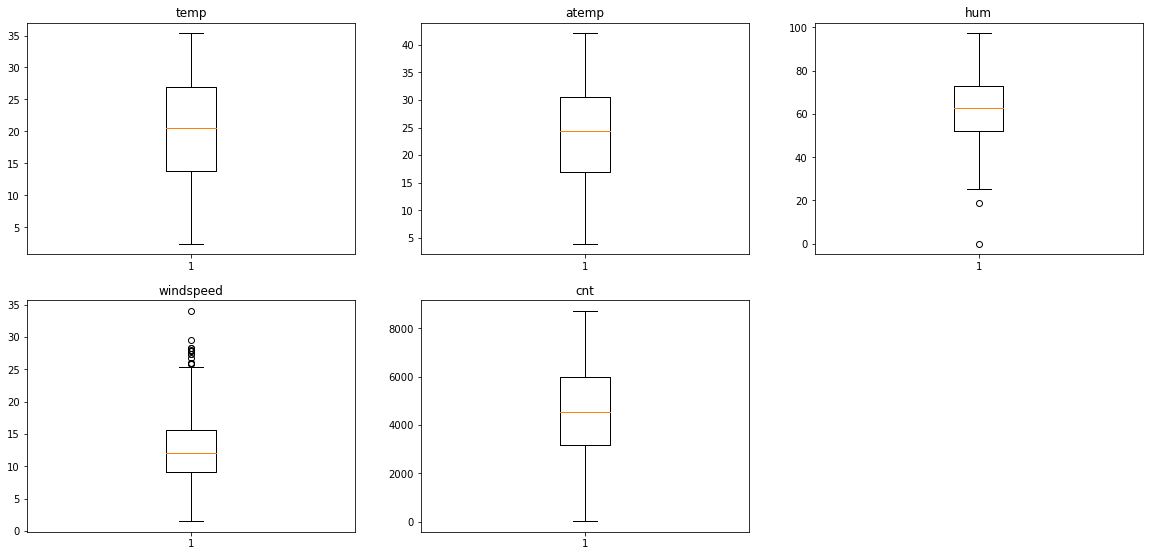

In [13]:
#Visulize the columns and outliers using box plot
plt.figure(figsize = (20,40))
for i in range(0, len(numeric_columns)):
    plt.subplot(8,3,i+1)
    plt.boxplot(df[numeric_columns[i]])
    plt.title(numeric_columns[i])

No outliers in all features except `windspeed`. The outlier values will be replaced by the upper limit value

In [14]:
#Define the upper limit of the "windspeed" variable
upper_windspeed = df.windspeed.quantile(0.75) + 1.5 * (df.windspeed.quantile(0.75) - df.windspeed.quantile(0.25))
upper_windspeed

25.501498125

In [15]:
#Replace all outliers with the upper limit value for "windspeed" variable
df.windspeed.values[df.windspeed.values > upper_windspeed] = upper_windspeed

## Step 2: Visualising the Data

Visulize the data to detect outliers, relationship, multicoliniarity, etc


Visulization will be done using `matplotlib` and `seaborn`.

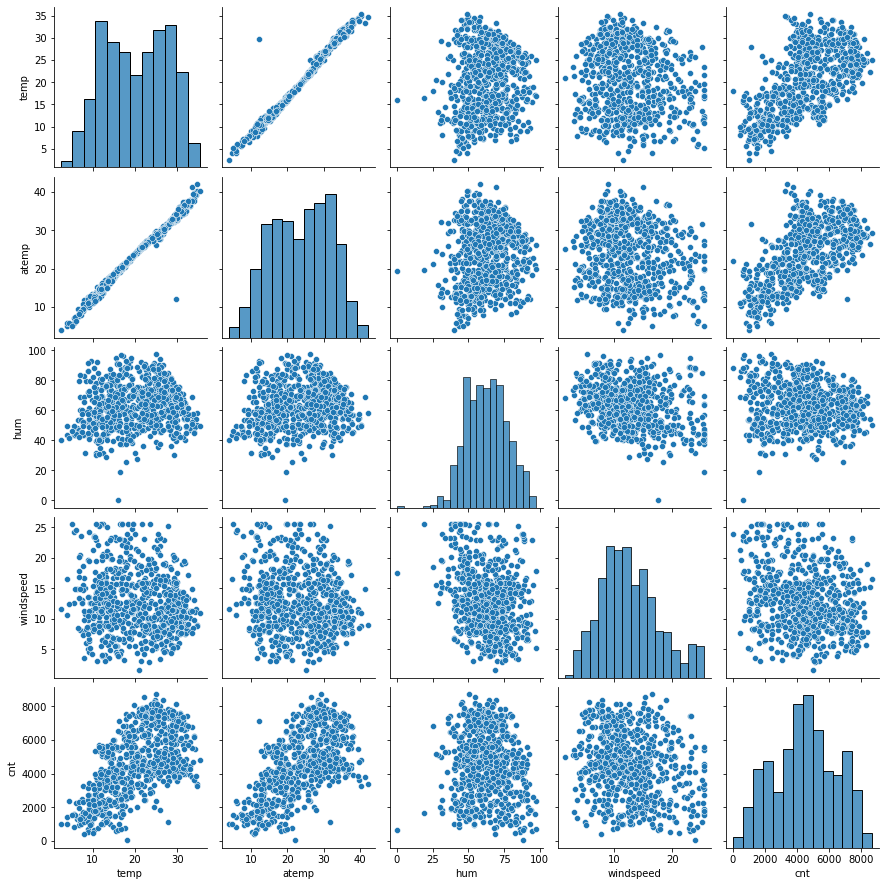

In [16]:
#pairplot for the numerical continuous variables
sns.pairplot(df[numeric_columns])
plt.show()

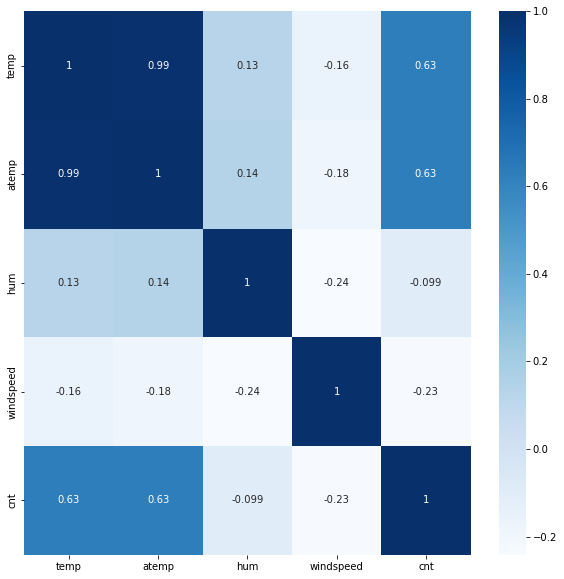

In [17]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(df[numeric_columns].corr(), annot = True, cmap="Blues")
plt.show()

- We can see a clear strong relationship between `temp` and `atemp` and it is not surprising since they are strongly related to each other, and they have the same correlaation coefficient with the target variable. `atemp` variable will be dropped arbitrarily due to the ease of detecting the actual temprature other than feel like tempreature.
- There is a relatively strong correlation between `cnt` and `temp` variable.

In [18]:
#drop "instant" and "dteday" vatiables
df.drop(['atemp'], axis = 1, inplace = True)

In [19]:
cat_variables = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

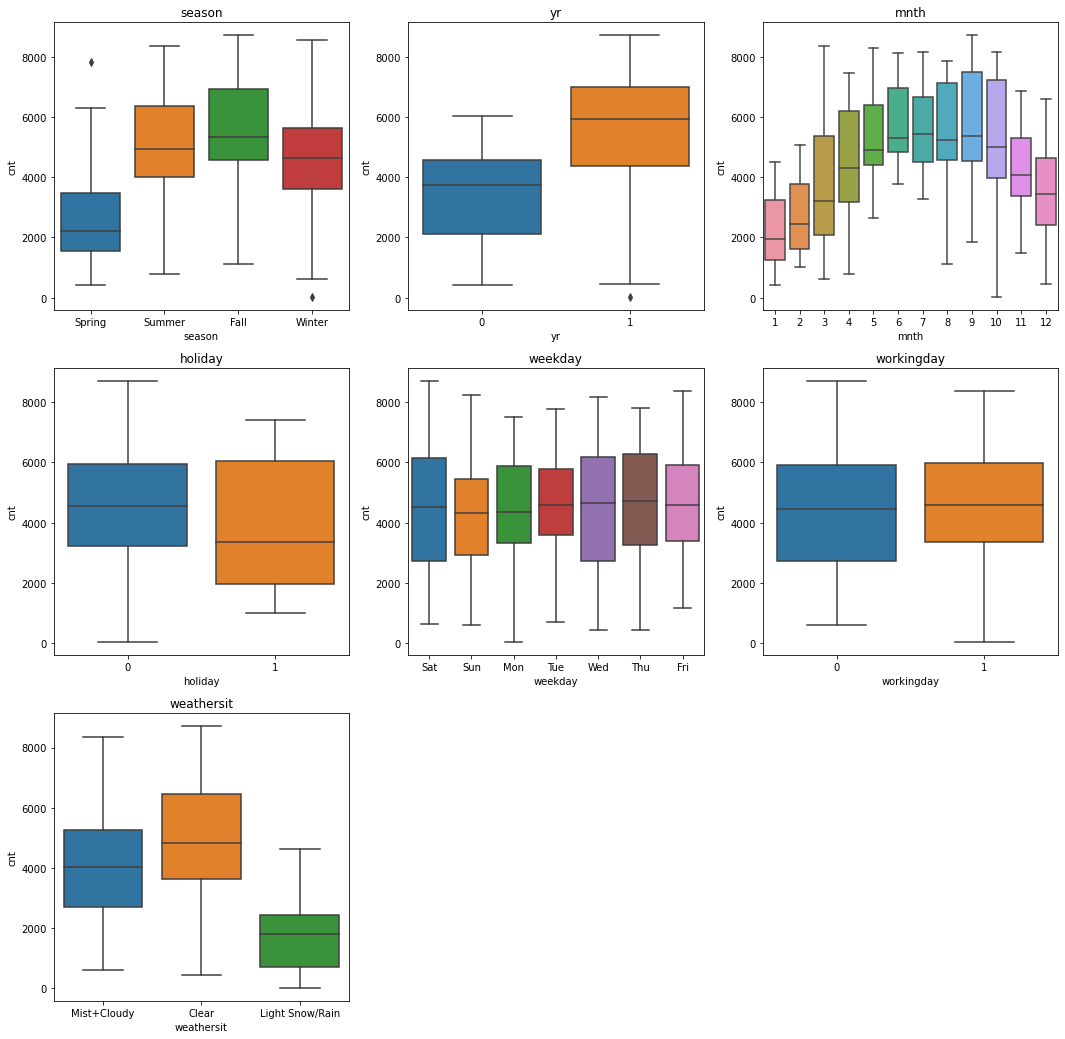

In [20]:
# Vizulize using box plot to identify the relationship between 'cnt' and the categorical vaaiables 
plt.figure(figsize = (18,18))
for i in range(0, len(cat_variables)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = cat_variables[i], y = 'cnt', data = df)
    plt.title(cat_variables[i])
plt.show()

- Looks like weather is a significant factor in number of bike rentals. As the weather more clear as the renatls increase.
- No sigificant difference of number of rentals between holidays and regular days. Eventhough the median is higher for regular days but the variance of the renatls is large in holidays and we can see both holidays and regular days have similar upper quartile. The uncertainity is higher in holidays but it is not significantly lower than non holidays.
- No difference in the number of bike rentals between the days of the week.
- It is obvious that the number of rentals is higher in 2019 compare to 2018
- Something is wrong in either `season` column, it shows spring as the season with the lowest rentals while in the months we can see that winter months (12,1,2) have the lowest rentals. this need to be invitigated.

In [21]:
# view the months during Spring season as per the dataframe
df.loc[df['season'] == 'Spring']['mnth'].value_counts()

1     62
2     56
3     40
12    22
Name: mnth, dtype: int64

In [22]:
# view the months during Winter season as per the dataframe
df.loc[df['season'] == 'Winter']['mnth'].value_counts()

10    62
11    60
12    40
9     16
Name: mnth, dtype: int64

In [23]:
# view the months during Fall season as per the dataframe
df.loc[df['season'] == 'Fall']['mnth'].value_counts()

7    62
8    62
9    44
6    20
Name: mnth, dtype: int64

In [24]:
# view the months during Summer season as per the dataframe
df.loc[df['season'] == 'Summer']['mnth'].value_counts()

5    62
4    60
6    40
3    22
Name: mnth, dtype: int64

We can see the labeling of the season column is wrong. it should be as following:
- 1 : Winter, 2: Spring, 3: Summer, 4: Fall instead of 1: Spring, 2: Summer, 3: Fall, 4: Winter

In [25]:
#correct "season" column values labeling
df.season = df.season.map({'Spring' : 'Winter', 'Summer' : 'Spring', 'Fall' : 'Summer', 'Winter' : 'Fall'})

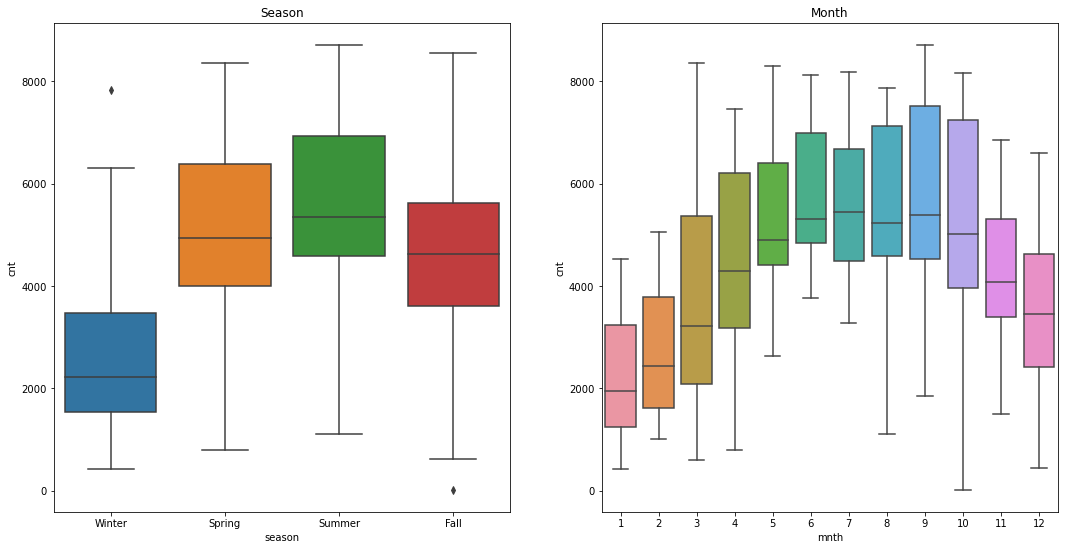

In [26]:
# Vizulize box plots for 'season' and 'mnth' variables after correcting the seasons labels
plt.figure(figsize = (18,9))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.title('Season')
plt.subplot(1,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.title('Month')
plt.show()

- Winter is the season with the lowest number of rentals which make sense.
- Late spring, summer, and early fall have the highest number of renatls. it is slightly more in Summer compare to Fall and Spring.
- Drop `mnth` variable because it looks like highly correlated with the `season` variable.

In [27]:
#drop "mnth" vatiables
df.drop(['mnth'], axis = 1, inplace = True)

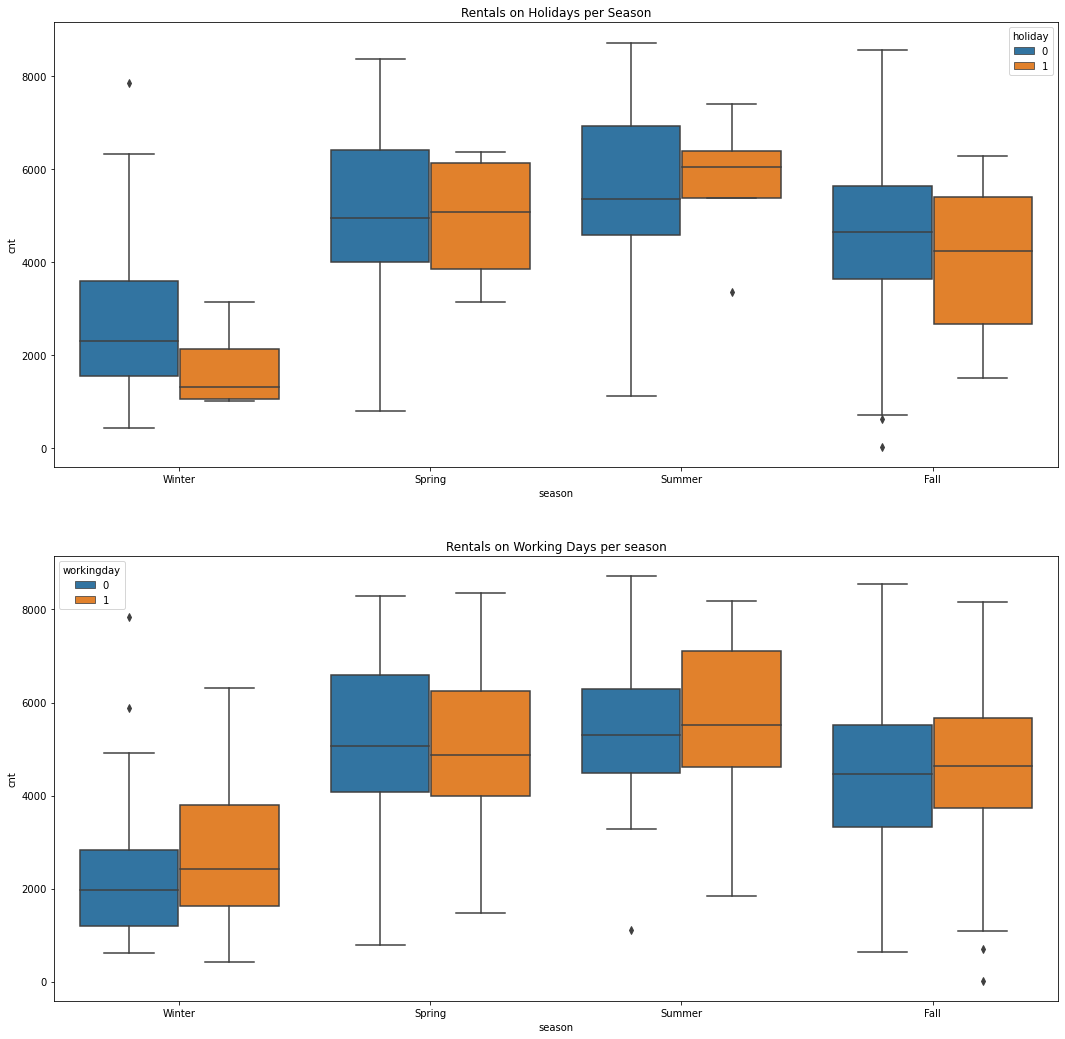

In [28]:
#visulize the sidribution of the data for regular days and holidays and between working days and weekends per season
plt.figure(figsize = (18, 18))
plt.subplot(2,1,1)
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = df)
plt.title('Rentals on Holidays per Season')
plt.subplot(2,1,2)
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = df)
plt.title('Rentals on Working Days per season')
plt.show()


Eventhough overall, there is no difference in rental between holidays and non holidays and between working days and non working days, we can see this is not the case when we segment the data per season:
- In winter, the number of renatls during working days is higher than holiday  but it is less obvious in the rest of the seasons.
- We can see that the uncertainity of the number of rentals during winter and summer is less compare to the rest of the seasons. We can be more certain that the number of rentals will be lower in winter holidays and higher in summer holidays.


## Step 3: Data Preparation

- We can see that we have 3 categorical columns which we need to create dummy variables for them in order to include them in the linear regression model


In [29]:
# Get the dummy variables for the some categorical features 
d1 = pd.get_dummies(df.season, drop_first = True)
d2 = pd.get_dummies(df.weathersit, drop_first = True)
d3 = pd.get_dummies(df.weekday, drop_first = True)

In [30]:
# Add the results to the original dataframe
df = pd.concat([df, d1, d2, d3], axis = 1)

In [31]:
df.columns

Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'cnt', 'Spring', 'Summer', 'Winter',
       'Light Snow/Rain', 'Mist+Cloudy', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed'],
      dtype='object')

In [32]:
# Drop the original categorical columns as we have created the dummies for them

df.drop(['season', 'weathersit', 'weekday'], axis = 1, inplace = True)

In [33]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow/Rain,Mist+Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,1,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,1,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,0,0,1


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [34]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [35]:
scaler = MinMaxScaler()

In [36]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow/Rain,Mist+Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.575354,0.413569,0.864243,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.363923,0.827658,0,1,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.351077,0.465255,0,0,1,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.911723,0.204096,0,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.259139,0.482973,1,0,0,0,1,0,1,0,0,0,0


In [37]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow/Rain,Mist+Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.438734,0.513620,0.245098,0.262745,0.243137,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.226870,0.224593,0.430568,0.440557,0.429398,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.273856,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.408027,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.569834,0.684710,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


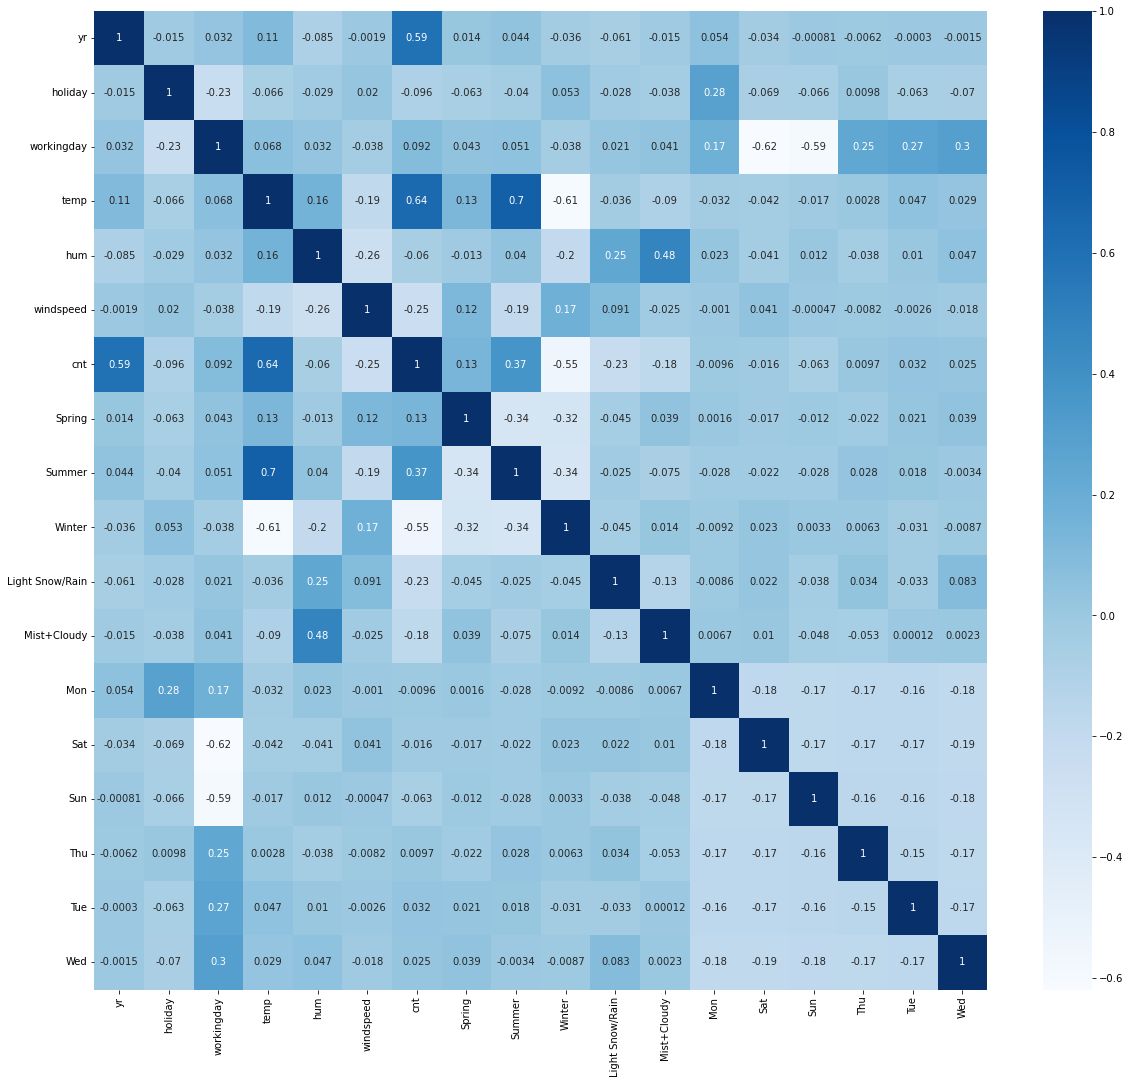

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="Blues")
plt.show()

### Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

In [40]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
#ranking of the features by rfe
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 4),
 ('Summer', False, 3),
 ('Winter', True, 1),
 ('Light Snow/Rain', True, 1),
 ('Mist+Cloudy', False, 2),
 ('Mon', False, 5),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 7),
 ('Tue', False, 6),
 ('Wed', False, 8)]

In [42]:
#features selected by rfe
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Winter',
       'Light Snow/Rain', 'Sat', 'Sun'],
      dtype='object')

In [43]:
#removed features by ref
X_train.columns[~rfe.support_]

Index(['Spring', 'Summer', 'Mist+Cloudy', 'Mon', 'Thu', 'Tue', 'Wed'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
# Adding a constant variable 
X_train_rm = sm.add_constant(X_train_rfe)

In [46]:
lm = sm.OLS(y_train,X_train_rm).fit()   # Running the linear model

In [47]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     238.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.68e-174
Time:                        12:59:42   Log-Likelihood:                 463.14
No. Observations:                 510   AIC:                            -906.3
Df Residuals:                     500   BIC:                            -863.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3313      0.025     

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,32.78
8,Sat,8.06
9,Sun,7.73
1,holiday,2.14
3,temp,1.63
6,Winter,1.62
4,hum,1.20
5,windspeed,1.13
7,Light Snow/Rain,1.11
0,yr,1.03


`holiday` is insignificant in presence of other variables

In [49]:
#drop holiday
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [51]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [52]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     238.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.68e-174
Time:                        12:59:42   Log-Likelihood:                 463.14
No. Observations:                 510   AIC:                            -906.3
Df Residuals:                     500   BIC:                            -863.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3633      0.040     

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.64
1,workingday,15.92
2,temp,9.70
4,windspeed,4.56
7,Sat,4.31
8,Sun,4.15
0,yr,2.06
5,Winter,1.92
6,Light Snow/Rain,1.11


`Sun` is insignificant in presence of other variables; can be dropped

In [54]:
#drop Sun
X_train_new2 = X_train_new.drop(['Sun'], axis = 1)

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new2)

In [56]:
lm = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

In [57]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     267.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.35e-175
Time:                        12:59:42   Log-Likelihood:                 462.26
No. Observations:                 510   AIC:                            -906.5
Df Residuals:                     501   BIC:                            -868.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3955      0.032     

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,11.00
2,temp,8.75
1,workingday,4.61
4,windspeed,4.09
0,yr,2.03
5,Winter,1.81
7,Sat,1.80
6,Light Snow/Rain,1.10


`hum` has a high VIF; can be dropped

In [59]:
#drop hum
X_train_new3 = X_train_new2.drop(['hum'], axis = 1)

In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_new3)

In [61]:
lm = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

In [62]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     276.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.79e-168
Time:                        12:59:42   Log-Likelihood:                 441.67
No. Observations:                 510   AIC:                            -867.3
Df Residuals:                     502   BIC:                            -833.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2414      0.022     

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
1,workingday,4.12
3,windspeed,3.95
0,yr,2.03
6,Sat,1.70
4,Winter,1.62
5,Light Snow/Rain,1.05


Eventhough temp VIF is higher than 5 buti will arbitrary leave it in the model because it is one of the features with the highest correlation with the target variable and also because I think temp has a significant contributionn to determine the number of bike rentals base on business knoweldge

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [64]:
y_train_price = lm.predict(X_train_lm3)

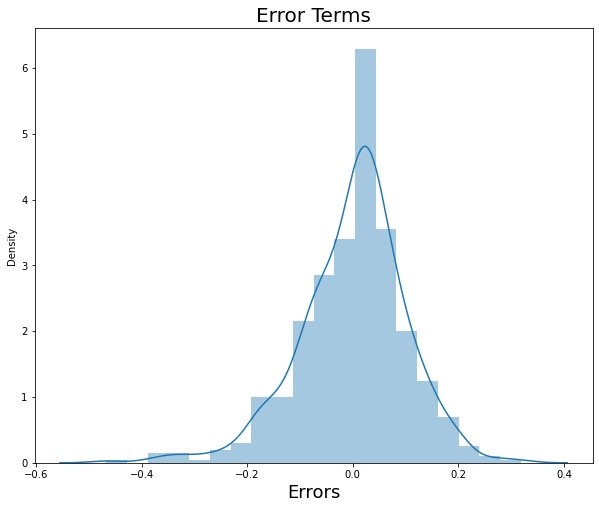

In [65]:
# Plot the histogram of the error terms
plt.figure(figsize = (10, 8))
sns.distplot((y_train - y_train_price), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Dividing into X_test and y_test

In [66]:
# scalling the test data as well
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [67]:
#Divide the test data into X and Y data sets 
y_test = df_test.pop('cnt')
X_test = df_test

In [68]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new3.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [69]:
# Making predictions using the final model

y_pred = lm.predict(X_test_new)

## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

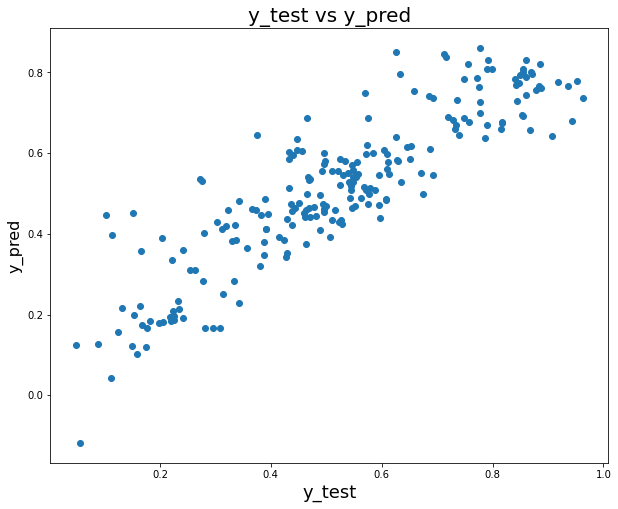

In [70]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (10, 8))
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     

In [71]:
#Calculating R Square for the test data
r2_score(y_test, y_pred)

0.7805695021010715

The R square for nthe test data almost matched the training data. This model can explain almost 78% of the variability in bike rental

We can see that the equation of our best fitted line is:

$ total rental bike (cnt) = 0.2372  \times  Year + 0.0457  \times  Workingday + 0.3819 \times Temprature -0.1133 \times Windspeed -0.1485 \times Winter -0.2481 \times Light Snow/Rain +0.0571 \times Saturday $

